In [16]:
import networkx as nx
from matplotlib import pyplot as plt
from itertools import combinations
from functools import wraps
import time

In [25]:
def timeit(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        start = time.perf_counter()
        result = func(*args, **kwargs)
        end = time.perf_counter()
        print(f"{func.__name__} took {end - start:.6f} seconds")
        return result
    return wrapper

In [26]:
@timeit
def brute_force(G, terminals):
    best_tree = None
    best_weight = float('inf')

    all_nodes = set(G)
    non_terminals = all_nodes - set(terminals)

    for r in range(len(non_terminals) + 1):
        for subset in combinations(non_terminals, r):
            nodes = set(terminals) | set(subset)
            subgraph = G.subgraph(nodes)

            if nx.is_connected(subgraph):
                T = nx.minimum_spanning_tree(subgraph, weight='weight')
                w = T.size(weight = 'weight')
                if w < best_weight:
                    best_weight = w
                    best_tree = T

    return best_tree, best_weight

In [27]:
G = nx.complete_graph(6)
for u,v in G.edges():
    G[u][v]['weight'] = 1

terminals = {0,2,5}

In [28]:
T, w = brute_force(G, terminals)

brute_force took 0.004558 seconds


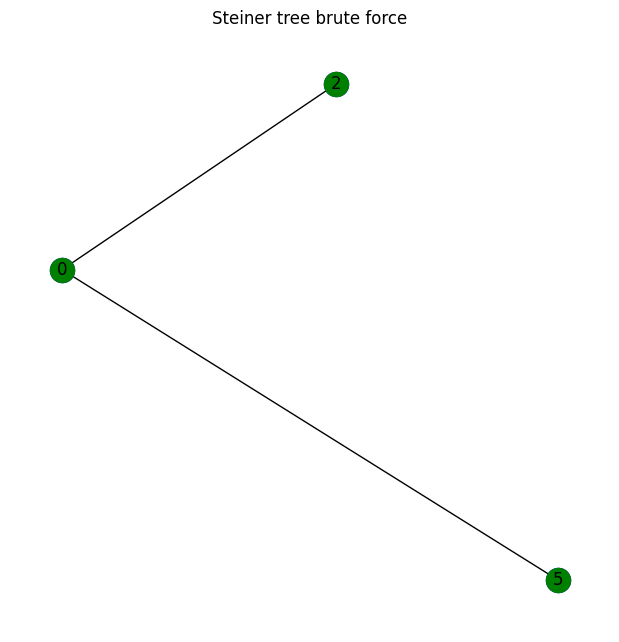

In [29]:
pos = nx.spring_layout(G)
plt.figure(figsize=(6,6))
nx.draw(T, pos, with_labels = True, node_color = 'blue')
nx.draw_networkx_nodes(T, pos, nodelist=terminals, node_color='green')
plt.title("Steiner tree brute force")
plt.show()

In [30]:
G2 = nx.Graph()
G2.add_nodes_from([0,1,2,3])
G2.add_weighted_edges_from([(0,1,5), (0,2, 2), (1,3, 20), (2,3, 10)])

terminals2 = {0,3}

In [31]:
T2, w2 = brute_force(G2,terminals2)

brute_force took 0.001146 seconds


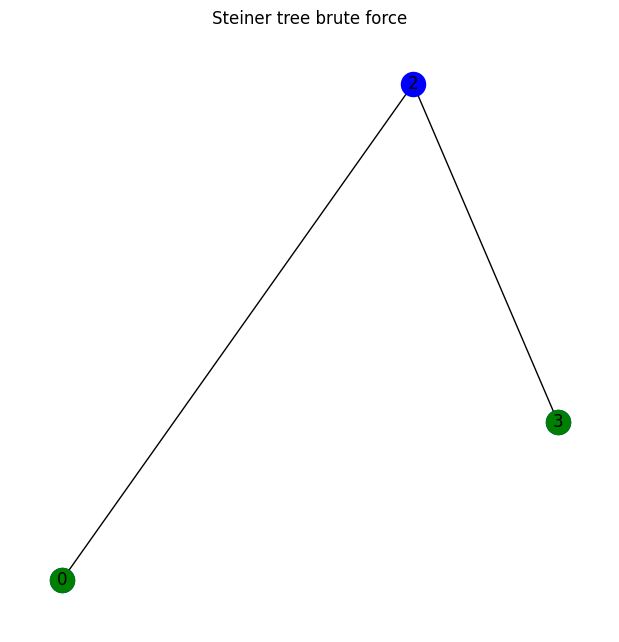

In [32]:
pos2 = nx.spring_layout(G2)
plt.figure(figsize=(6,6))
nx.draw(T2, pos2, with_labels = True, node_color = 'blue')
nx.draw_networkx_nodes(T2, pos2, nodelist=terminals2, node_color='green')
plt.title("Steiner tree brute force")
plt.show()